# Description of the project

hello all the viewers who want to make a mchine learning model which identifies how toxic are the text/comments. and rate them according to the categories like threat, toxicity, insult, obscene language. 

**And build a Gradio Application to view the functioning of machine learning model**



## The process of building the application and presenting it

1. Installing the dependencies like Tensdorflow, Tensorflow -gpu pandas sklearn
  

    1.   Tensorflow - for building the machine learning models with help keras of
    2.   Tensorflow-gpu - for harnessing the power of gpu for better computation power 
    3.   Pandas - for building the data set from the given train CSV file

### Pre Processing the data

first we have to perform tokenization of data which is done by using Textvectorization from tensorflow.keras.layers

And prepare datapipeline to fed into the deep learning model

### Building a deep learning model

Creating a sequential model using tensorflow.keras.models importing Sequential Model

### Making Model prediction

### Evaluate the working of model

### Making a gradio for displaying the functionality of the machine learning model







#1 Installing required Dependencies.


In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [42]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
os.path.join('content','drive','MyDrive','Text toxicity model data','train.csv')  #/content/drive/MyDrive/Text toxicity model data/train.csv

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Text toxicity model data/train.csv')

In [45]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [46]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [47]:
# lets get a look at the coloumns
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

# Pre Procesing the data

In [48]:
from tensorflow.keras.layers import TextVectorization

In [49]:
TextVectorization??
# A preprocessing layer which maps text features to integer sequences.

In [50]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [51]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [52]:
X = df['comment_text']   # seperating the data into comment_text columns
y =df[df.columns[2:]].values #seperating the data into features columns

In [53]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [54]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [55]:
MAX_WORDS = 300000  #number of words in vocab

In [56]:
vectorizer = TextVectorization(max_tokens = MAX_WORDS, output_sequence_length=2000, output_mode = 'int')

In [57]:
vectorizer.adapt(X.values)

In [58]:
vectorizer('hello world, life is great')

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([288, 263, 306, ...,   0,   0,   0])>

In [59]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [60]:
vectorized_text = vectorizer(X.values)

In [61]:
vectorized_text

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[   645,     76,      2, ...,      0,      0,      0],
       [219427,     54,   2489, ...,      0,      0,      0],
       [   425,    441,     70, ...,      0,      0,      0],
       ...,
       [ 32445,   7392,    383, ...,      0,      0,      0],
       [     5,     12,    534, ...,      0,      0,      0],
       [     5,      8,    130, ...,      0,      0,      0]])>

## Building a data pipeline


In [62]:
# MAP -> Cache -> shuffle -> batch -> prefetch from tensor_slices, list_files

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [63]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [64]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [65]:
train_generator =train.as_numpy_iterator()


In [66]:
train_generator.next()

(array([[146179,  10613,      8, ...,      0,      0,      0],
        [   191,    288,      5, ...,      0,      0,      0],
        [     9,     12,    130, ...,      0,      0,      0],
        ...,
        [   793,  22724,      0, ...,      0,      0,      0],
        [     8,    105,      7, ...,      0,      0,      0],
        [    40,     25,  26737, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

#2 DEEP learning Model

##2.1 Creating a sequential Model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [68]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_WORDS+1,32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [69]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          9600032   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                      

In [71]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 709s 101ms/step - loss: 0.0619 - val_loss: 0.0463
Epoch 2/5
6981/6981 [==============================] - 712s 102ms/step - loss: 0.0453 - val_loss: 0.0388
Epoch 3/5
6981/6981 [==============================] - 713s 102ms/step - loss: 0.0405 - val_loss: 0.0339
Epoch 4/5
6981/6981 [==============================] - 725s 104ms/step - loss: 0.0356 - val_loss: 0.0309
Epoch 5/5
6981/6981 [==============================] - 720s 103ms/step - loss: 0.0313 - val_loss: 0.0278


In [72]:
history.history

{'loss': [0.06187304109334946,
  0.045293889939785004,
  0.04045658931136131,
  0.03556494042277336,
  0.03131736069917679],
 'val_loss': [0.04626167565584183,
  0.0388483926653862,
  0.0339345782995224,
  0.030896401032805443,
  0.027813147753477097]}

In [40]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

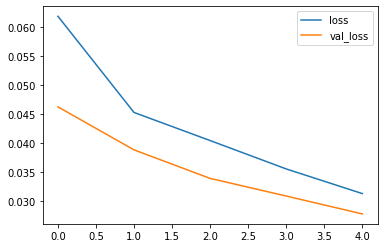

In [73]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

#4 Making Model predictions


In [74]:
input_text = vectorizer('You freaking suck! I am going to hit you.')


In [77]:
np.expand_dims(input_text,0)

array([[   7, 7158,  397, ...,    0,    0,    0]])

In [85]:
batch = test.as_numpy_iterator().next()

In [88]:
batch_X, batch_y =test.as_numpy_iterator().next()

In [89]:
((model.predict(batch_X))>0.5).astype(int)

1/1 [==============================] - 0s 74ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [78]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 67ms/step


#5 Evaluate Model

In [90]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [91]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [92]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 59ms/step


In [93]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9011370539665222, Recall:0.7827160358428955, Accuracy:0.4874624013900757


#6 Test and Gradio App

In [94]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 4.6 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 278 kB 80.4 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 106 kB 63.9 MB/s 
     |████████████████████████████████| 2.3 MB 58.6 MB/s 
     |████████████████████████████████| 84 kB 5.0 MB/s 
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 80 kB 11.8 MB/s 
     |████████████████████████████████| 68 kB 8.9 MB/s 
     |████████████████████████████████| 58 kB 7.9 MB/s 
     |████████████████████████████████| 50 kB 8.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=f66c3a34878b48ec01a14828f7d2fd0020a8e88db7319b27b8394c0cab550d49
  Stored in direc

In [95]:
import tensorflow as tf
import gradio as gr

In [96]:
model.save('text_toxicity.h5')

In [98]:
model = tf.keras.models.load_model('text_toxicity.h5')

In [99]:
input_str = vectorizer('hey i freaken hate you!')

In [100]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 716ms/step


In [101]:
res

array([[0.8268359 , 0.00182657, 0.02714728, 0.01612768, 0.2287659 ,
        0.05538357]], dtype=float32)

In [107]:
def score_text(Text):
    vectorized_comment = vectorizer([Text])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [108]:
interface = gr.Interface(fn=score_text, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='text to score'),
                        outputs='text')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [109]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://3c8e6bb1-5f03-4673.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
